<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/svrt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from functools import partial

In [188]:
# The Conditional Expectation Function
def cef(size):
  return 80_000 + size + 0.1*size**2

cef(2000)

482000.0

In [189]:
# Creating an array of 1000 elements
xs_true = jnp.linspace(0, 3000, 1000)

In [190]:
# Mapping the Conditional Expectation Function across the array.
ys_true = jax.vmap(cef)(xs_true)

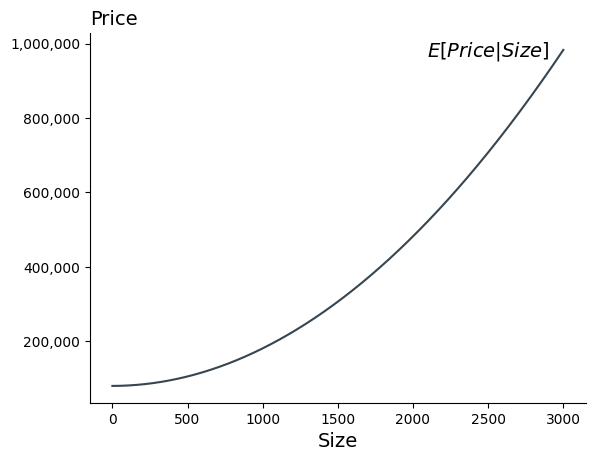

In [191]:
plt.plot(xs_true, ys_true, color="#36454F")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
ax.annotate(r'$E[Price | Size]$',
            xy = (0.68, 0.95),
            xycoords='axes fraction',
            ha='left',
            va='center',
            fontsize=14)
plt.show()

In [192]:
def Price(x, key):
  expected_price = cef(x)
  noise = 75_000*jax.random.normal(key)
  return expected_price + noise

In [193]:
pop_size = 1_000_000
xs = jax.random.uniform(jax.random.PRNGKey(0), minval=80, maxval = 3000, shape=(pop_size,))
keys = jax.random.split(jax.random.PRNGKey(0), pop_size)
ys = jax.vmap(Price)(xs, keys)

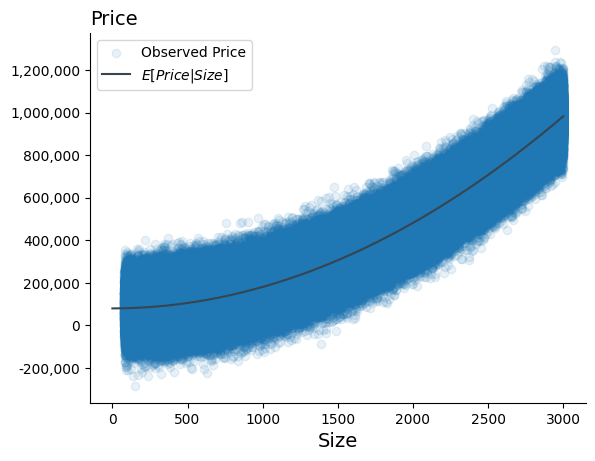

In [194]:
plt.scatter(xs, ys, alpha=0.1, label='Observed Price')
plt.plot(xs_true, ys_true, color="#36454F", label=r'$E[Price | Size]$')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.legend()
plt.show()

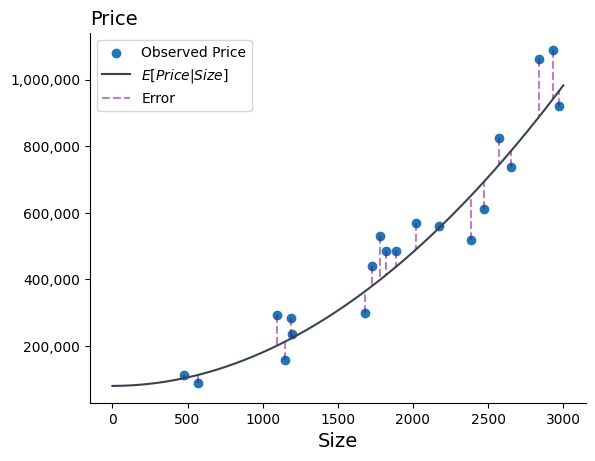

In [195]:
k = 20
xs_mini = xs[:k]
ys_mini = ys[:k]


# Scatter plot of points
plt.scatter(xs_mini, ys_mini, label='Observed Price')

# Plot of true relationship line
plt.plot(xs_true, ys_true, color="#36454F", label=r'$E[Price | Size]$')

for i, (x, y) in enumerate(zip(xs_mini, ys_mini)):
    if i == 0:
      plt.plot([x, x], [y, cef(x)], color="purple", linestyle="--", alpha=0.5, label='Error')
    else:
      plt.plot([x, x], [y, cef(x)], color="purple", linestyle="--", alpha=0.5)  # Connect observed to true point


# Customize axes and appearance
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Label and title
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.legend()
plt.show()

In [201]:
ys_true_scatter = list(map(cef, xs))
plt.scatter(ys_true_scatter, ys)
plt.show()

KeyboardInterrupt: 

In [196]:
df = pd.DataFrame({'price': ys, 'size': xs})

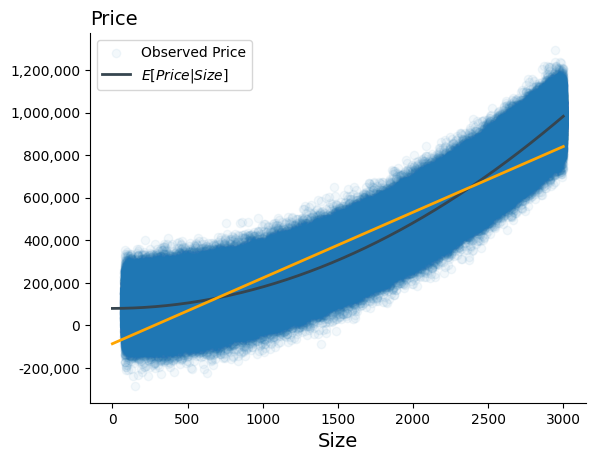

In [200]:
linear_model = smf.ols('price ~ size', data =df)
results1 = linear_model.fit()
def model(params, x):
  return params[0] + params[1]*x
f = partial(model, results1.params.values)
xs_linear = np.linspace(0, 3000, 100)
ys_linear = list(map(f, xs_linear))

plt.scatter(xs, ys, alpha=0.05, label='Observed Price')
plt.plot(xs_true, ys_true, color="#36454F", label=r'$E[Price | Size]$', linewidth=2)
plt.plot(xs_linear, ys_linear, color='orange', linewidth=2)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.legend()
plt.show()